In [10]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [11]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Class"] = y

In [12]:
df.head()

,Feature 1,Feature 2,Class
0,0.830858,-0.334342,1
1,0.991710,0.879000,0
2,1.107245,-0.470344,1
3,-0.140899,1.033148,0
4,0.405592,1.328529,0


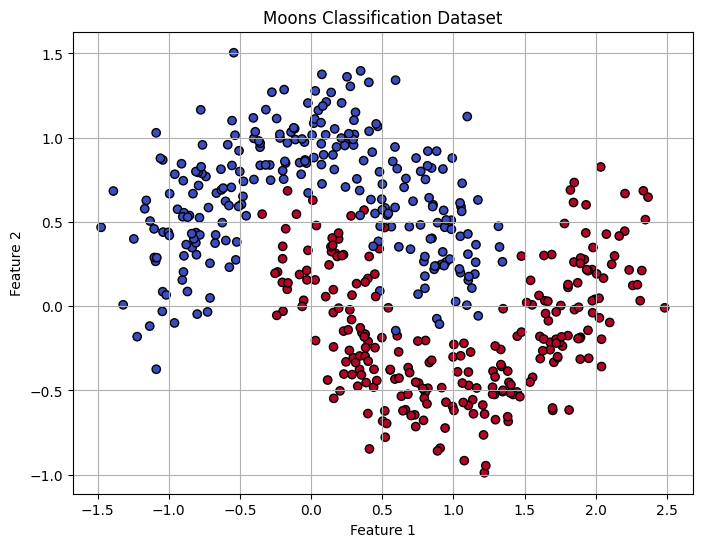

In [13]:
# Visualizing the data
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature 1"], df["Feature 2"], c=df["Class"], cmap="coolwarm", edgecolors="k")
plt.title("Moons Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [14]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

# Xavier/Gloret Normal Weight Initialization(Manual)

In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.get_weights()

[array([[-0.35833216, -0.03100693, -0.4141629 , -0.4616292 , -0.47444236,
          0.11962503, -0.34612626,  0.684679  , -0.52557844, -0.32128206],
        [ 0.2072519 ,  0.15646881, -0.18668556, -0.06695616,  0.1547339 ,
         -0.20234346,  0.20442837,  0.54990226, -0.04348242,  0.6503132 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.21343297,  0.38983697,  0.15136927, -0.28520763,  0.28442448,
          0.41607565, -0.34150797,  0.3947937 ,  0.41203314, -0.31715995],
        [ 0.12973583, -0.41486573,  0.40378708,  0.29986537, -0.29340276,
         -0.16049328,  0.04470783,  0.5269823 , -0.15005243,  0.46806014],
        [ 0.1808052 , -0.47838008,  0.19635189,  0.4717934 ,  0.09892154,
          0.00659585, -0.43979287, -0.03654367, -0.01780361,  0.3033685 ],
        [ 0.43384713,  0.296192  , -0.08654279,  0.2858305 ,  0.43075413,
         -0.5073168 , -0.1828472 ,  0.49494612, -0.0787167 , -0.3103868 ],
        [-0.04307

In [18]:
initial_weights = model.get_weights()

In [19]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [20]:
model.set_weights(initial_weights)

In [21]:
model.get_weights()

[array([[-0.586188  , -0.39610782,  0.5284164 ,  0.43159696, -0.01477966,
          0.08296299,  0.9034455 , -0.41830415,  0.38685626, -0.1429718 ],
        [-0.15392385,  0.77695256,  0.5836575 ,  0.57523817,  0.9231129 ,
          0.01485196,  0.48221356, -0.21939173,  0.22922023, -0.09202503]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.03067282,  0.18820518, -0.2587441 ,  0.661671  , -0.31813064,
         -0.38396016,  0.36622682,  0.25034574,  0.19736402,  0.1987003 ],
        [-0.00387277, -0.28373674,  0.02397151, -0.21413733,  0.30835992,
         -0.04650363, -0.26104513, -0.10163113,  0.1305804 , -0.17826536],
        [-0.26000893,  0.07706066,  0.07746523, -0.16030951, -0.14895539,
          0.07338063, -0.4579245 , -0.44507912, -0.22719201, -0.06749792],
        [ 0.09831761,  0.4665486 ,  0.2712158 , -0.050577  , -0.00601345,
         -0.31702763, -0.00585437, -0.09128188,  0.10205257, -0.2615934 ],
        [ 0.16423

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2994 - loss: 0.7136 - val_accuracy: 0.5300 - val_loss: 0.6975
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5607 - loss: 0.6963 - val_accuracy: 0.7200 - val_loss: 0.6882
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7058 - loss: 0.6859 - val_accuracy: 0.7700 - val_loss: 0.6719
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7821 - loss: 0.6655 - val_accuracy: 0.7900 - val_loss: 0.6428
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7728 - loss: 0.6438 - val_accuracy: 0.8200 - val_loss: 0.6168
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8294 - loss: 0.6114 - val_accuracy: 0.8300 - val_loss: 0.5901
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7879 - loss: 0.6120 - val_accuracy: 0.8200 - val_loss: 0.5684
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8144 - loss: 0.5841 - val_accuracy: 0.8200 

In [24]:
model.get_weights()

[array([[-0.92026556, -0.25043347,  0.7260177 ,  0.27715638,  0.02991569,
          0.00968916,  1.2361368 , -0.8074529 ,  0.665619  , -0.50745827],
        [ 0.09342697,  0.73892266,  0.7586065 ,  0.67572993,  0.8536684 ,
          0.24903497,  0.54236263,  0.05338152,  0.35067067,  0.44157684]],
       dtype=float32),
 array([-0.22007886,  0.5339025 , -0.32766676,  0.14977424,  0.36926207,
         0.22102115, -0.05510714, -0.17442217, -0.20307022, -0.09568121],
       dtype=float32),
 array([[ 3.0123764e-01,  2.8607303e-01, -3.3424169e-01,  1.1861867e+00,
          1.1924476e-01, -2.0489441e-01,  6.6692746e-01,  3.7859064e-01,
          7.0613801e-01,  1.1185430e-02],
        [ 4.3114778e-01, -3.2070503e-01,  7.6054662e-02, -1.3117190e-03,
          5.9217262e-01, -2.9788437e-01, -2.2575217e-01,  2.1154536e-02,
          4.3891510e-01, -3.8556004e-01],
        [-6.4298439e-01,  1.7217009e-01,  4.3774536e-01, -5.0086953e-02,
         -3.1708862e-04,  2.9261869e-01, -2.4770999e-01, -3

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

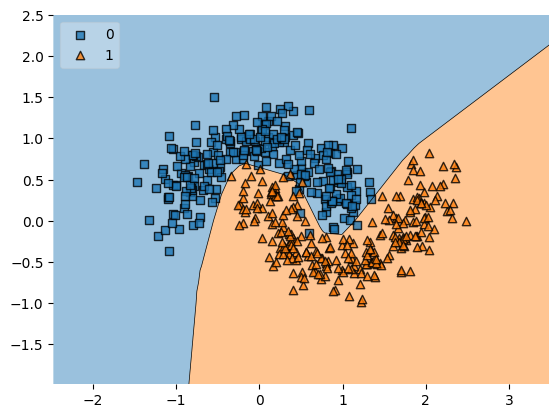

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [26]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.026968866429415716)

In [27]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.026323820648373908)

# He Normal Initialization

In [28]:
model2 = Sequential()

model2.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model2.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model2.get_weights()

[array([[ 0.48266354, -0.7959184 , -0.8667708 ,  1.0365764 ,  1.4841695 ,
          0.2321608 ,  0.6437943 ,  0.96457887,  0.46030083,  1.0101209 ],
        [-0.37370822, -0.02038017, -1.7426242 ,  0.62895817,  1.0622636 ,
          1.4737942 ,  0.4265595 ,  0.25312263,  0.5449655 ,  0.79520863]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.56589156,  0.20160368, -0.14981975,  0.8831943 , -0.46904406,
         -0.09224543,  0.3734021 ,  0.63886845,  0.24611737, -0.34415808],
        [ 0.32119593,  0.57762194, -0.31213254,  0.55140007, -0.20855369,
          0.24507144,  0.00447261, -0.55120885, -0.78147644,  0.77536726],
        [-0.45042935,  0.18936396,  0.28432843, -0.48947126,  0.6760437 ,
          0.867794  , -0.23399477, -0.59060174, -0.1973241 , -0.28170928],
        [-0.20766297, -0.5552012 , -0.00350791,  0.13224037,  0.18587752,
         -0.09545614, -0.43730572,  0.19882725,  0.17348267, -0.9000673 ],
        [-0.06464

In [30]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history2 = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5074 - loss: 0.7887 - val_accuracy: 0.5600 - val_loss: 0.7097
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5770 - loss: 0.6819 - val_accuracy: 0.7100 - val_loss: 0.6516
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7055 - loss: 0.6257 - val_accuracy: 0.7400 - val_loss: 0.6018
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7994 - loss: 0.5770 - val_accuracy: 0.8600 - val_loss: 0.5560
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8632 - loss: 0.5297 - val_accuracy: 0.8200 - val_loss: 0.5264
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8458 - loss: 0.5094 - val_accuracy: 0.8200 - val_loss: 0.4997
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8701 - loss: 0.4662 - val_accuracy: 0.8200 - val_loss: 0.4744
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8508 - loss: 0.4519 - val_accuracy: 0.85

In [32]:
model2.get_weights()

[array([[ 5.9584755e-01, -1.2934597e+00, -8.3504325e-01,  1.1762764e+00,
          1.6134440e+00,  2.1255897e-01,  6.6133499e-01,  1.1337775e+00,
          3.8565254e-01,  1.0225669e+00],
        [-5.6791252e-01,  8.9425687e-04, -1.7230330e+00,  3.3853936e-01,
          1.1620625e+00,  1.5314721e+00,  5.9819263e-01, -8.7003969e-02,
          6.5515548e-01,  7.8911299e-01]], dtype=float32),
 array([-0.22860764, -0.16051334,  0.21765245,  0.04720832, -0.07066156,
         0.2931408 , -0.11799829,  0.54770964, -0.3818786 ,  0.03136712],
       dtype=float32),
 array([[-0.58276594,  0.1682236 , -0.20673567,  0.9779649 , -0.5823271 ,
          0.3473357 ,  0.06458449,  1.111346  ,  0.38253194, -0.34415808],
        [ 0.6300933 ,  1.0334361 , -0.2814911 ,  0.35061416, -0.02266797,
          0.16714174,  0.48663476, -0.5431991 , -0.70348126,  1.119865  ],
        [-0.2297147 ,  0.47818437,  0.01458368, -0.43740648,  0.880774  ,
          0.93956184,  0.21162072, -0.02511912,  0.30542666,  0.0

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

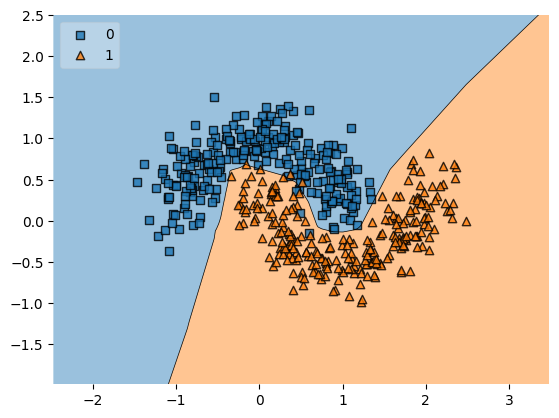

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)